In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Attendance data

- load attendance.csv and calculate attendance percentage for each student.
    - half of a day is worth 50%
    - 10 tardes == 1 absense

In [2]:
attendance = pd.read_csv('data/attendance.csv')
attendance.head()

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [3]:
grades = {
    'P': 1,
    'H': .5,
    'T': .9,
    'A': 0
}

attendance_percentages=(
    attendance.replace(grades)
              .rename(columns={'Unnamed: 0': 'name'})
              .melt(id_vars='name')
              .groupby('name')
              .value.mean()
)

In [4]:
attendance_percentages

name
Billy    0.5250
Jane     0.6875
John     0.9125
Sally    0.7625
Name: value, dtype: float64

## 2. Coffee levels

<ol>
<li>a. Read the *coffee_levels.csv* file.
<li>b. Transform the data so that each carafe is in it's own column.
<li>c. Is this the best shape for the data?

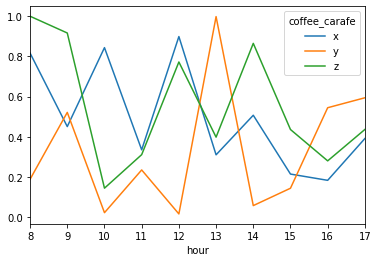

In [5]:
coffee_levels = pd.read_csv('data/coffee_levels.csv')
coffee_levels.pivot_table('coffee_amount', 'hour', 'coffee_carafe').plot()

## 3.Cake Recipes
<ol>
<li>Read the cake_recipes.csv data. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.
<li>Tidy the data as necessary.
<li>Which recipe, on average, is the best? recipe b
<li>Which oven temperature, on average, produces the best results? 275
<li>Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees

In [6]:
df = pd.read_csv('data/cake_recipes.csv')
df.head(3)

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541


In [7]:
df = df.melt(id_vars='recipe:position', var_name='temp', value_name='cake_score')
recipe_position = df['recipe:position'].str.split(':', expand=True)
recipe_position.columns = ['recipe', 'position']
df = pd.concat([df, recipe_position], axis=1).drop(columns='recipe:position')

In [8]:
df.groupby('recipe').cake_score.mean()

recipe
a    63.922201
b    76.736074
c    75.874748
d    62.864844
Name: cake_score, dtype: float64

In [9]:
df.groupby('temp').mean()

,cake_score
temp,
225,71.306022
250,66.577437
275,74.886754
300,66.627655


In [10]:
df.groupby('temp').cake_score.mean()

temp
225    71.306022
250    66.577437
275    74.886754
300    66.627655
Name: cake_score, dtype: float64

In [11]:
df.groupby('temp').cake_score.mean().nlargest(1)

temp
275    74.886754
Name: cake_score, dtype: float64

In [12]:
df.groupby('temp').cake_score.mean().sort_values().tail(1).index

Index(['275'], dtype='object', name='temp')

In [13]:
df.groupby(['recipe', 'position', 'temp']).cake_score.mean().nlargest(1)

recipe  position  temp
b       bottom    300     99.248541
Name: cake_score, dtype: float64